# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Elias, Emanuele Francesco (344489);
2. Kjaer, Christian Valentin (334931). 

In [23]:
StudentID1 = 344489  # <-------- Fill in the missing value
StudentID2 = 334931  # <-------- Fill in the missing value

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [32]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Phobias
Interests
Movies
*************************************
*** THESE ARE THE SELECTED FEATURES:
Loneliness
Dreams
God
Finding lost valuables
Number of friends
Keeping promises
Health
Appearence and gestures
Getting angry
Waiting
Decision making
Final judgement
Cheating in school
Thinking ahead
Internet usage
Workaholism
Giving
Compassion to animals
Lying
Changing the past
Getting up
Elections
Charity
Reliability
Borrowed stuff
Questionnaires or polls
Parents' advice
Assertiveness
Socializing
Judgment calls
Eating to survive
Friends versus money
Funniness
Responding to a serious letter
Children
Life struggles
New environment
Empathy
Smoking
Alcohol
Healthy eating
Flying
Storm
Darkness
Heights
Spiders
Snakes
Rats
Ageing
Dangerous dogs
Fear of public speaking
History
Psychology
Politics
Mathematics
Physics
Internet
PC
Economy Management
Biology
Chemistry
Reading
Geography
Foreign languages
Medicine
Law
Cars
Art exhibitio

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [25]:
# DO NOT IMPORT NUMPY
# import ...
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
from IPython.display import display  # to display variables in a "nice" way

## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

In [96]:
#1
df = pd.read_csv("responses_hw.csv")

#2
X_df=df[these_features]
sample_size = int(len(X_df) * 2 / 3)
X_df = X_df.sample(n=sample_size, random_state=42)
display(X_df)

#3
#first of all, we can look for missing values
print('')
print(f'****************************************')
print('')
rows_with_null_values = X_df[X_df.isnull().any(axis=1)].index
print(f"There are {len(rows_with_null_values)} rows with missing values:")
print('')
print(rows_with_null_values)
print('')
print(f'****************************************')
print('')
columns_with_null_values = X_df.columns[X_df.isnull().any()]
print(f"There are {len(columns_with_null_values)} rows with missing values:")
print('')
print(columns_with_null_values)
print('')
print(f'****************************************')
print('')
null_counts = X_df.isnull().sum()
sorted_null_counts = null_counts.sort_values(ascending=False)
print("Columns sorted by the number of missing values:")
print('')
print(sorted_null_counts)
print('')
print(f'****************************************')
print('')
X_df = X_df.dropna()
display(X_df)
print('')
print(f'****************************************')
print('')
print("Number of columns for each data type:")
display(X_df.dtypes.value_counts())
print("Columns with categorical data:")
print('')
print(X_df.select_dtypes(include=['object']).columns)


smoking_map = {
    "never smoked": 1,
    "tried smoking": 2,
    "former smoker": 3,
    "current smoker": 5
}

alcohol_map = {
    "never": 1,
    "social drinker": 3,
    "drink a lot": 5
}

lying_map = {
    "never": 1,
    "only to avoid hurting someone": 2,
    "sometimes": 3,
    "everytime it suits me": 5
}

internet_usage_map = {
    "no time at all": 1,
    "less than an hour a day": 2,
    "few hours a day": 3,
    "most of the day": 5
}


# Apply the mappings to the respective columns
X_df['Smoking'] = X_df['Smoking'].map(smoking_map)
X_df['Alcohol'] = X_df['Alcohol'].map(alcohol_map)
X_df['Lying'] = X_df['Lying'].map(lying_map)
X_df['Internet usage'] = X_df['Internet usage'].map(internet_usage_map)

#for uniformity let's change float values in int values
float_columns = X_df.select_dtypes(include=['float']).columns
X_df[float_columns] = X_df[float_columns].astype(int)

display(X_df)



,Loneliness,Dreams,God,Finding lost valuables,Number of friends,Keeping promises,Health,Appearence and gestures,Getting angry,Waiting,...,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
629,3.0,2,5.0,2.0,3,1.0,2.0,2.0,1.0,1.0,...,4.0,5.0,4.0,1.0,3.0,5.0,5.0,2.0,1.0,3.0
788,3.0,3,4.0,3.0,3,5.0,5.0,3.0,3.0,2.0,...,3.0,4.0,3.0,2.0,3.0,4.0,4.0,2.0,1.0,NaN
684,2.0,3,4.0,4.0,4,5.0,3.0,4.0,2.0,3.0,...,4.0,5.0,4.0,2.0,1.0,5.0,3.0,1.0,1.0,2.0
516,3.0,5,5.0,5.0,5,5.0,5.0,5.0,2.0,1.0,...,5.0,5.0,1.0,5.0,5.0,5.0,5.0,3.0,3.0,5.0
529,3.0,3,1.0,3.0,3,5.0,3.0,4.0,2.0,2.0,...,2.0,3.0,2.0,2.0,3.0,4.0,4.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,2.0,4,5.0,1.0,5,4.0,4.0,4.0,2.0,3.0,...,4.0,5.0,2.0,3.0,5.0,2.0,3.0,4.0,2.0,4.0
762,1.0,3,4.0,2.0,5,5.0,5.0,5.0,2.0,3.0,...,5.0,5.0,3.0,2.0,3.0,2.0,2.0,4.0,3.0,5.0
111,5.0,2,5.0,4.0,5,4.0,2.0,5.0,4.0,2.0,...,2.0,4.0,4.0,2.0,2.0,5.0,4.0,4.0,2.0,4.0
226,5.0,3,5.0,5.0,1,5.0,3.0,3.0,3.0,1.0,...,3.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,1.0,5.0



****************************************

There are 148 rows with missing values:

Index([629, 788, 516, 321, 837, 668, 247, 902, 887,  76,
       ...
       849, 660, 437,  37, 975, 858, 882, 708, 706, 226],
      dtype='int64', length=148)

****************************************

There are 84 rows with missing values:

Index(['God', 'Finding lost valuables', 'Keeping promises', 'Health',
       'Appearence and gestures', 'Getting angry', 'Waiting',
       'Decision making', 'Final judgement', 'Cheating in school',
       'Thinking ahead', 'Workaholism', 'Giving', 'Compassion to animals',
       'Lying', 'Changing the past', 'Getting up', 'Elections', 'Charity',
       'Reliability', 'Borrowed stuff', 'Questionnaires or polls',
       'Parents' advice', 'Socializing', 'Judgment calls',
       'Friends versus money', 'Funniness', 'Responding to a serious letter',
       'Children', 'Life struggles', 'New environment', 'Empathy', 'Smoking',
       'Alcohol', 'Healthy eating', 'Flying

,Loneliness,Dreams,God,Finding lost valuables,Number of friends,Keeping promises,Health,Appearence and gestures,Getting angry,Waiting,...,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
684,2.0,3,4.0,4.0,4,5.0,3.0,4.0,2.0,3.0,...,4.0,5.0,4.0,2.0,1.0,5.0,3.0,1.0,1.0,2.0
529,3.0,3,1.0,3.0,3,5.0,3.0,4.0,2.0,2.0,...,2.0,3.0,2.0,2.0,3.0,4.0,4.0,4.0,2.0,2.0
657,3.0,4,4.0,5.0,5,5.0,4.0,5.0,4.0,2.0,...,2.0,5.0,5.0,2.0,1.0,5.0,5.0,4.0,1.0,3.0
552,3.0,3,5.0,3.0,4,4.0,3.0,3.0,3.0,3.0,...,4.0,5.0,5.0,1.0,5.0,4.0,4.0,4.0,1.0,2.0
531,4.0,3,3.0,3.0,3,3.0,3.0,1.0,1.0,4.0,...,1.0,4.0,4.0,3.0,4.0,5.0,5.0,5.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,5.0,3,5.0,2.0,5,5.0,5.0,5.0,5.0,5.0,...,3.0,5.0,3.0,2.0,5.0,2.0,3.0,5.0,2.0,4.0
687,3.0,3,4.0,3.0,3,5.0,3.0,3.0,3.0,3.0,...,3.0,5.0,4.0,2.0,3.0,4.0,5.0,3.0,1.0,4.0
762,1.0,3,4.0,2.0,5,5.0,5.0,5.0,2.0,3.0,...,5.0,5.0,3.0,2.0,3.0,2.0,2.0,4.0,3.0,5.0
111,5.0,2,5.0,4.0,5,4.0,2.0,5.0,4.0,2.0,...,2.0,4.0,4.0,2.0,2.0,5.0,4.0,4.0,2.0,4.0



****************************************

Number of columns for each data type:


float64    87
int64       4
object      4
Name: count, dtype: int64

Columns with categorical data:

Index(['Internet usage', 'Lying', 'Smoking', 'Alcohol'], dtype='object')


,Loneliness,Dreams,God,Finding lost valuables,Number of friends,Keeping promises,Health,Appearence and gestures,Getting angry,Waiting,...,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
684,2,3,4,4,4,5,3,4,2,3,...,4,5,4,2,1,5,3,1,1,2
529,3,3,1,3,3,5,3,4,2,2,...,2,3,2,2,3,4,4,4,2,2
657,3,4,4,5,5,5,4,5,4,2,...,2,5,5,2,1,5,5,4,1,3
552,3,3,5,3,4,4,3,3,3,3,...,4,5,5,1,5,4,4,4,1,2
531,4,3,3,3,3,3,3,1,1,4,...,1,4,4,3,4,5,5,5,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,5,3,5,2,5,5,5,5,5,5,...,3,5,3,2,5,2,3,5,2,4
687,3,3,4,3,3,5,3,3,3,3,...,3,5,4,2,3,4,5,3,1,4
762,1,3,4,2,5,5,5,5,2,3,...,5,5,3,2,3,2,2,4,3,5
111,5,2,5,4,5,4,2,5,4,2,...,2,4,4,2,2,5,4,4,2,4


## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.


****************************************

Variance of each feature in Xstd_df:
Loneliness                1.001908
Dreams                    1.001908
God                       1.001908
Finding lost valuables    1.001908
Number of friends         1.001908
                            ...   
Fantasy/Fairy tales       1.001908
Animated                  1.001908
Documentary               1.001908
Western                   1.001908
Action                    1.001908
Length: 95, dtype: float64

****************************************

Variance of each feature in Xmm_df:
Loneliness                0.085690
Dreams                    0.027678
God                       0.137075
Finding lost valuables    0.096396
Number of friends         0.069213
                            ...   
Fantasy/Fairy tales       0.088851
Animated                  0.093845
Documentary               0.077687
Western                   0.076412
Action                    0.090020
Length: 95, dtype: float64

****************

/Users/emanueleelias/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


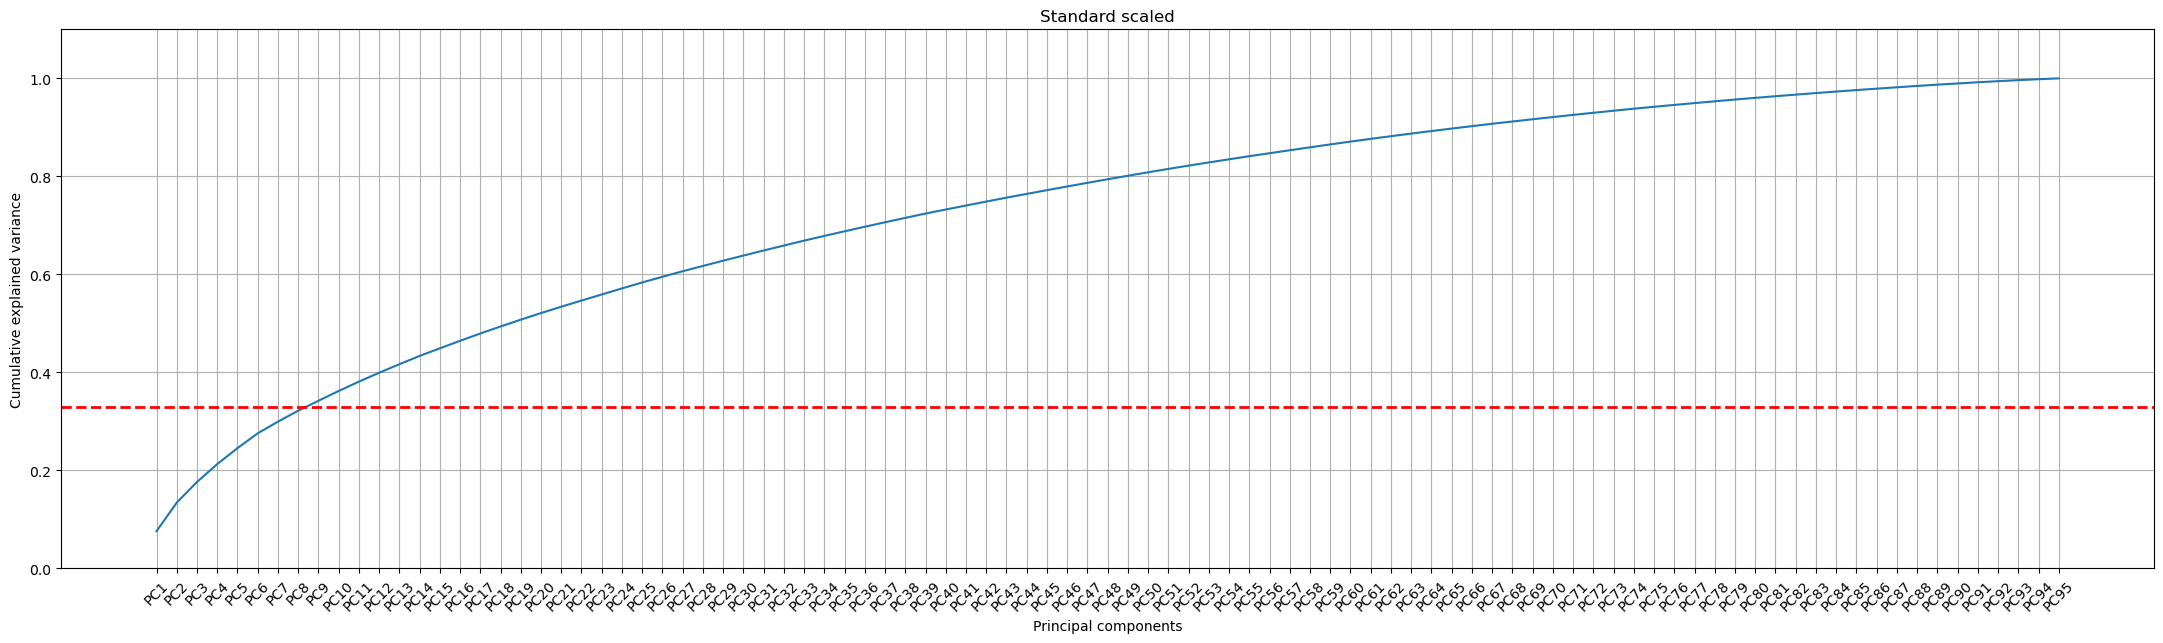

/Users/emanueleelias/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


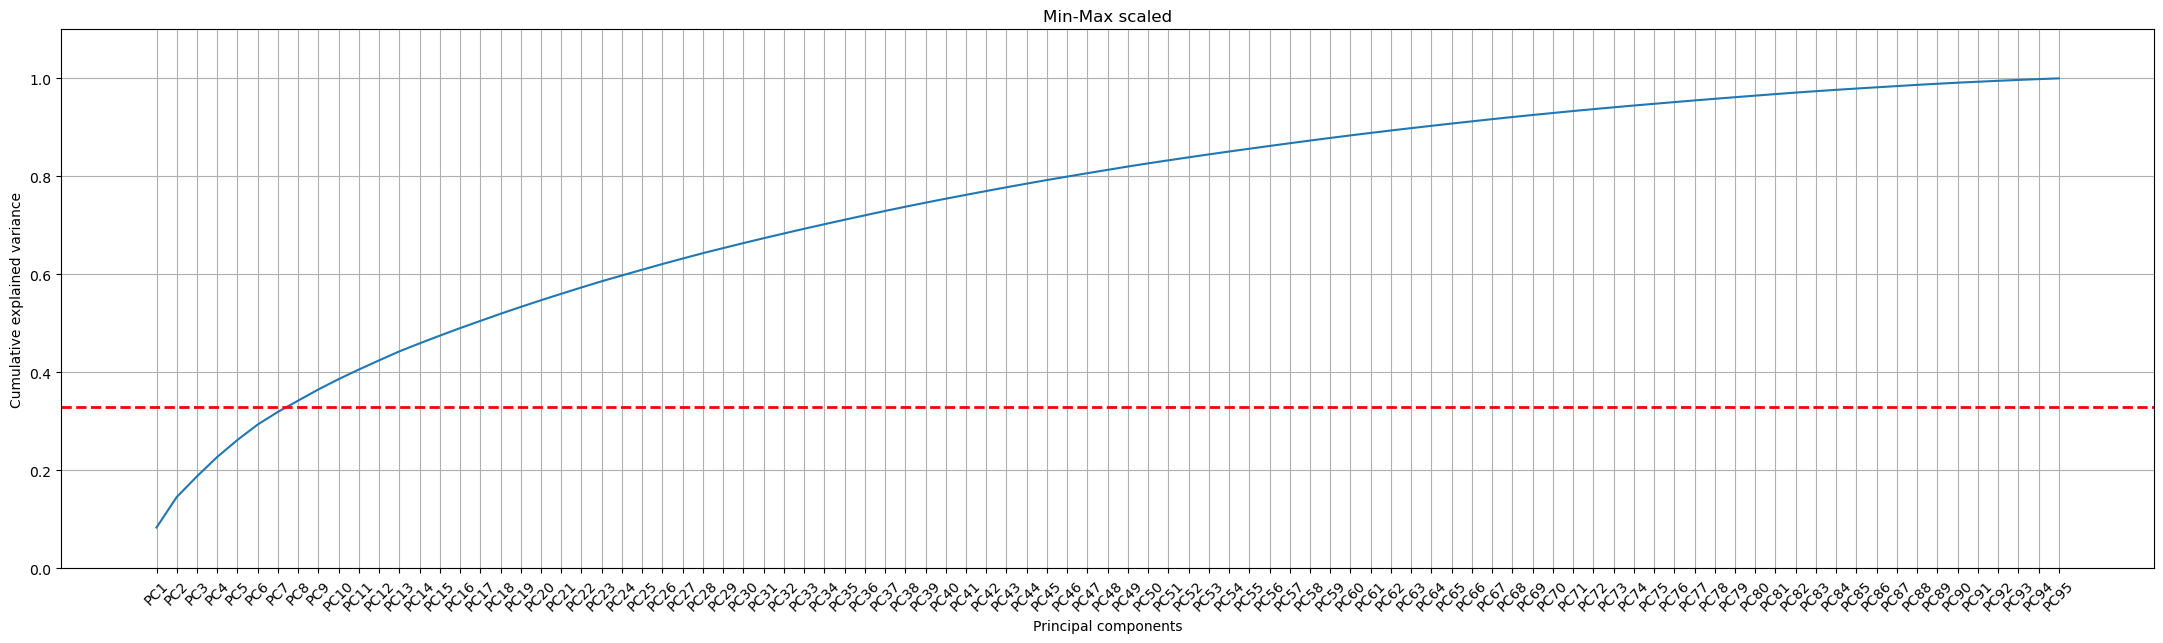

In [116]:
#1
standard_scaler = StandardScaler()
standard_scaler.fit(X_df)
Xstd_df = standard_scaler.transform(X_df)
Xstd_df = pd.DataFrame(standard_scaler.transform(X_df), columns=X_df.columns, index=X_df.index)

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_df)
Xmm_df = min_max_scaler.transform(X_df)
Xmm_df = pd.DataFrame(min_max_scaler.transform(X_df), columns=X_df.columns, index=X_df.index)

#2

# Variance of each feature in Xstd_df
print('')
print(f'****************************************')
print('')
variance_Xstd = Xstd_df.var()

print("Variance of each feature in Xstd_df:")
print(variance_Xstd)

# Variance of each feature in Xmm_df
print('')
print(f'****************************************')
print('')
variance_Xmm = Xmm_df.var()

print("Variance of each feature in Xmm_df:")
print(variance_Xmm)

#3
print('')
print(f'****************************************')
print('')
# INITIALIZE THE PCA
pca_full_std = PCA()  

# FIT THE PCA
pca_full_std.fit(Xstd_df)  

# MAKE THE CUMULATIVE EXPLAINED VARIANCE PLOT
plt.figure(figsize=(27,7))
plt.plot(np.cumsum(pca_full_std.explained_variance_ratio_))
plt.axhline(y=0.33, color='red', linestyle='--', linewidth=2, label='33%')
plt.title('Standard scaled')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_full_std.n_features_), 
           labels=[f'PC{i + 1}' for i in range(pca_full_std.n_features_)], rotation=45)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

# INITIALIZE THE PCA
pca_full_mm = PCA()  

# FIT THE PCA
pca_full_mm.fit(Xmm_df)  

# MAKE THE CUMULATIVE EXPLAINED VARIANCE PLOT
plt.figure(figsize=(27,7))
plt.plot(np.cumsum(pca_full_mm.explained_variance_ratio_))
plt.axhline(y=0.33, color='red', linestyle='--', linewidth=2, label='33%')
plt.title('Min-Max scaled')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_full_mm.n_features_), 
           labels=[f'PC{i + 1}' for i in range(pca_full_mm.n_features_)], rotation=45)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()


## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

Question 1

In [122]:
m = 5

# INITIALIZE THE PCA
pca_m_std = PCA(n_components=m)   
pca_m_mm = PCA(n_components=m) 

# FIT THE PCA
pca_m_std.fit(Xstd_df)  
pca_m_mm.fit(Xmm_df)  

PCA(n_components=5)

Question 2

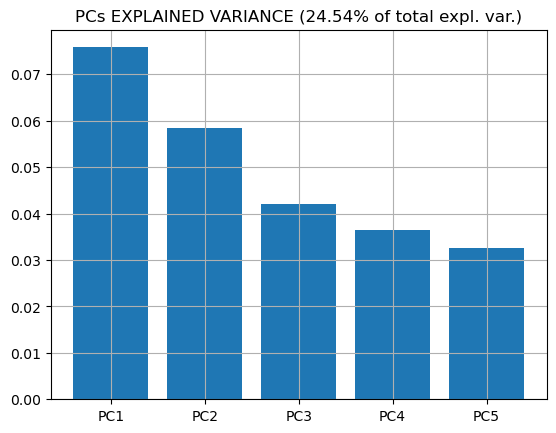

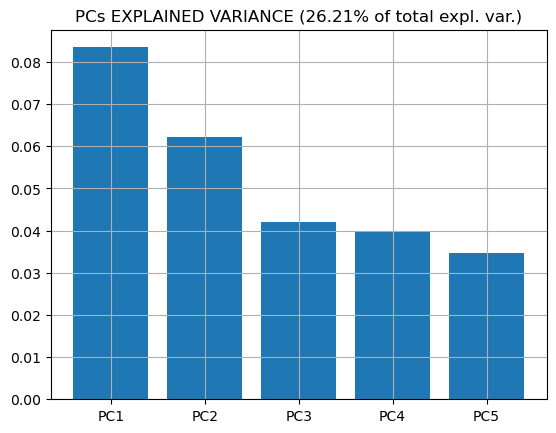

In [123]:
#2

# COMPUTE THE PERCENTAGE OF TOT. EXPL. VARIANCE (ROUNDED TO 2 DECIMALS)
round_expl_var_ratio_std = np.round(np.sum(pca_m_std.explained_variance_ratio_),decimals=4)  


plt.figure()
plt.bar([0,1,2,3,4], pca_m_std.explained_variance_ratio_)
plt.xticks(ticks=np.arange(m), 
           labels=[f'PC{i + 1}' for i in range(m)])
plt.title(f'PCs EXPLAINED VARIANCE ({round_expl_var_ratio_std*100}% of total expl. var.)')
plt.grid()
plt.show()

round_expl_var_ratio_mm = np.round(np.sum(pca_m_mm.explained_variance_ratio_),decimals=4)  # <-- TODO!!


plt.figure()
plt.bar([0,1,2,3,4], pca_m_mm.explained_variance_ratio_)
plt.xticks(ticks=np.arange(m), 
           labels=[f'PC{i + 1}' for i in range(m)])
plt.title(f'PCs EXPLAINED VARIANCE ({round_expl_var_ratio_mm*100}% of total expl. var.)')
plt.grid()
plt.show()


/Users/emanueleelias/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


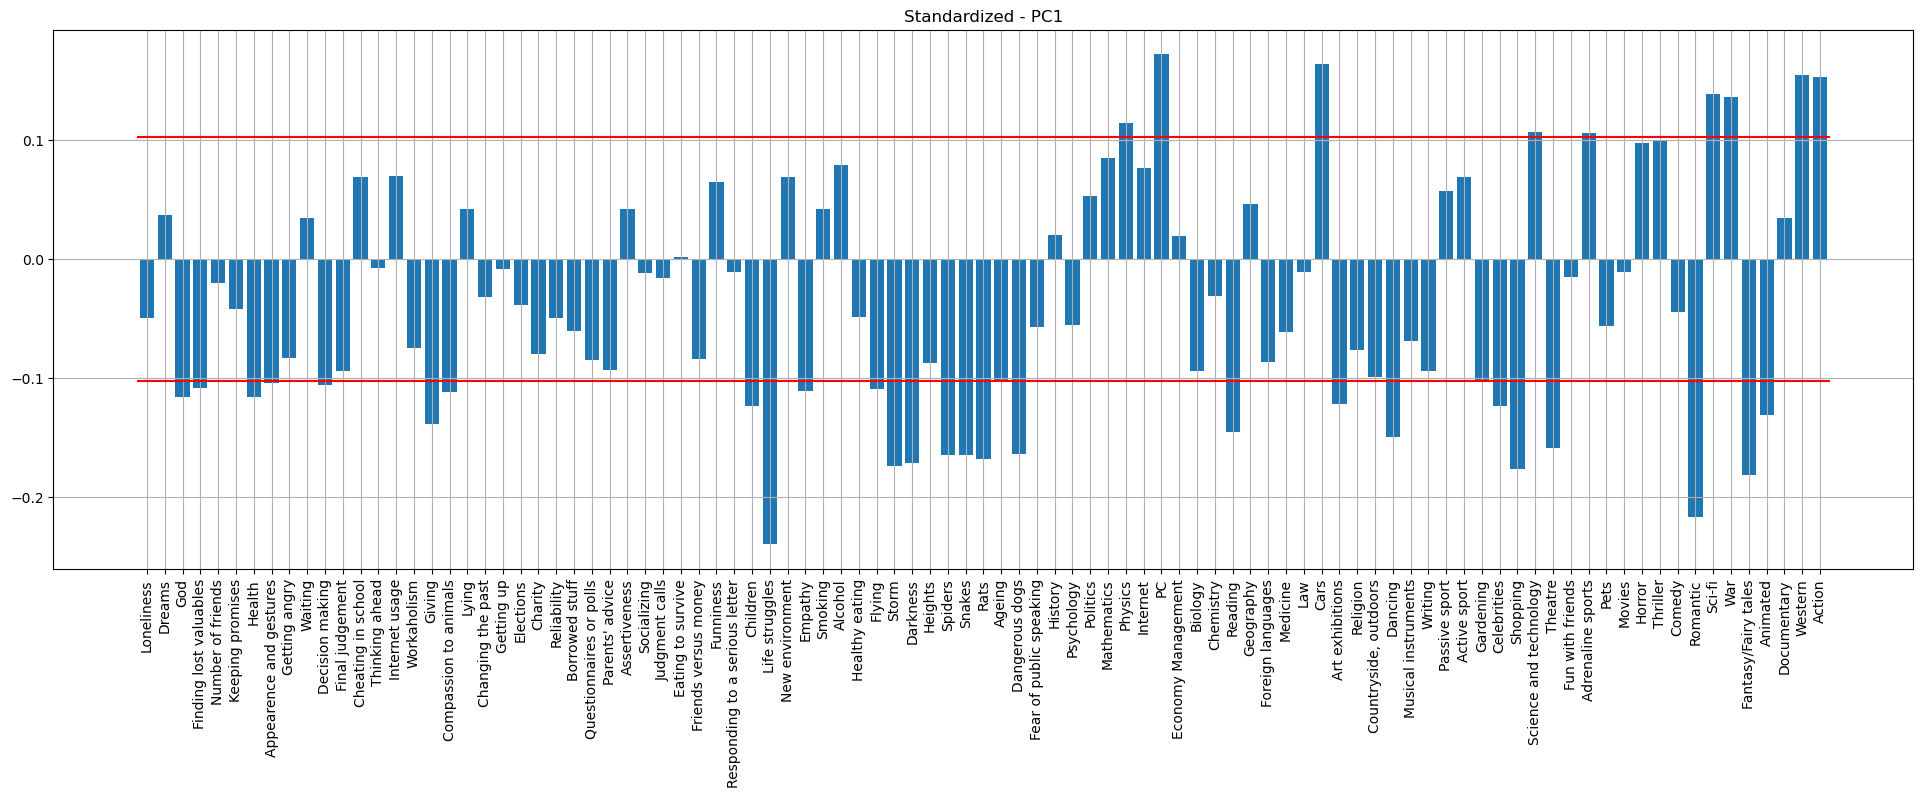


****************** PC1 standardised **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Physics', 'PC', 'Cars', 'Science and technology', 'Adrenaline sports', 'Sci-fi', 'War', 'Western', 'Action']

HIGH-VALUED NEGATIVE COMPONENTS: ['God', 'Finding lost valuables', 'Health', 'Appearence and gestures', 'Decision making', 'Giving', 'Compassion to animals', 'Children', 'Life struggles', 'Empathy', 'Flying', 'Storm', 'Darkness', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Reading', 'Art exhibitions', 'Dancing', 'Celebrities', 'Shopping', 'Theatre', 'Romantic', 'Fantasy/Fairy tales', 'Animated']
*********************************************



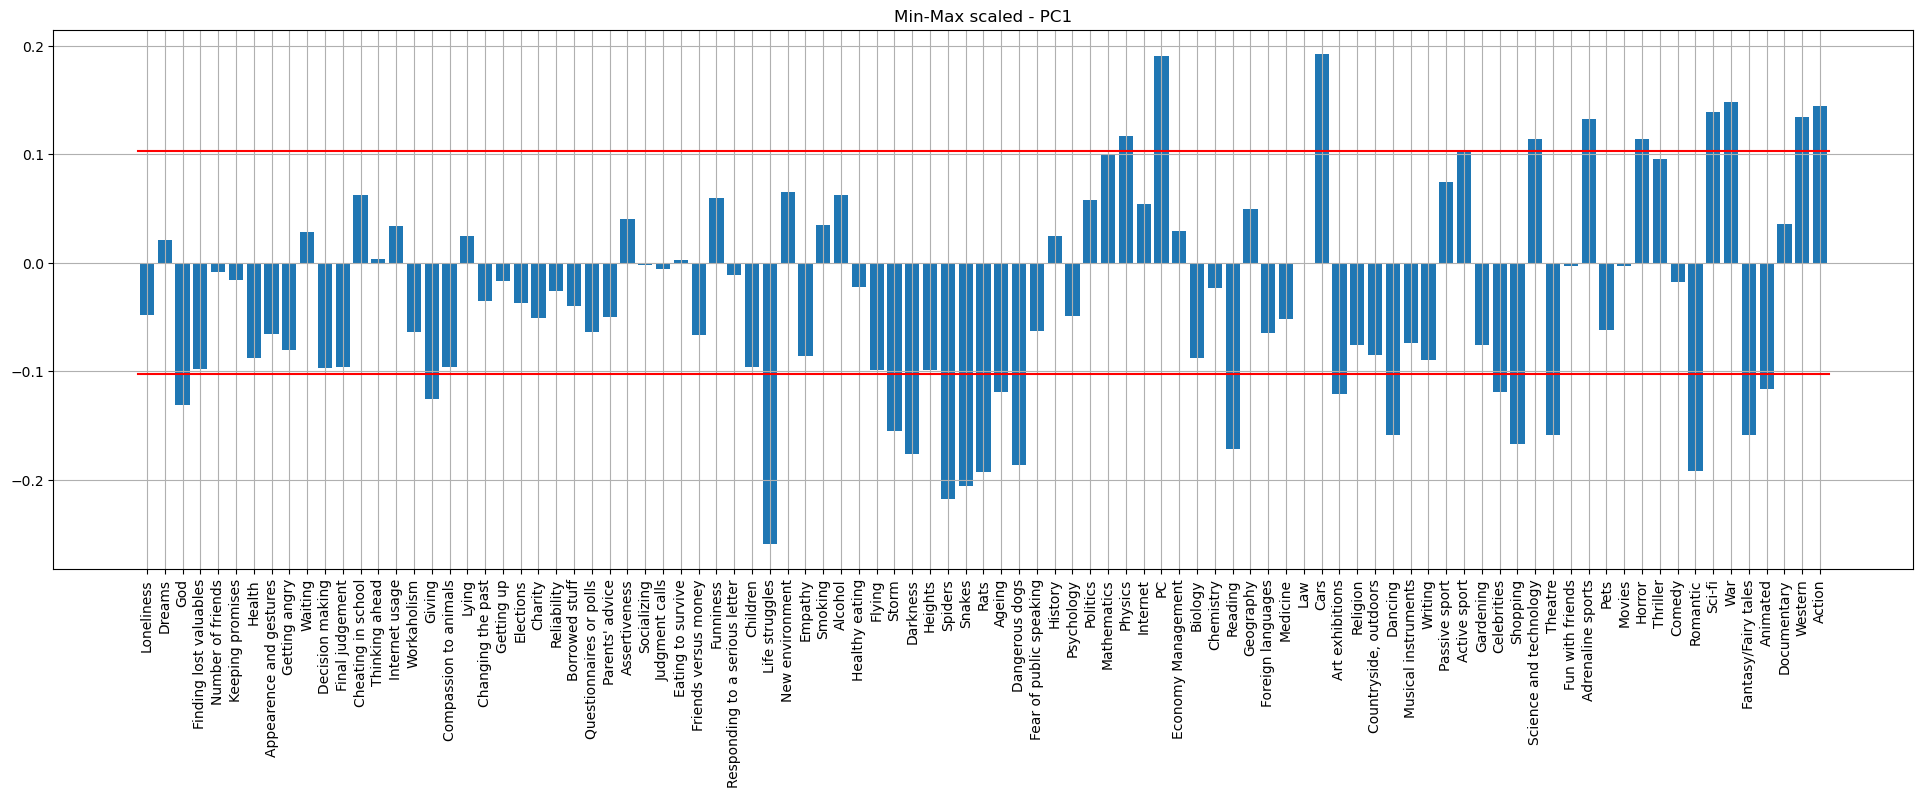


****************** PC1 min-max scaled **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Physics', 'PC', 'Cars', 'Science and technology', 'Adrenaline sports', 'Horror', 'Sci-fi', 'War', 'Western', 'Action']

HIGH-VALUED NEGATIVE COMPONENTS: ['God', 'Giving', 'Life struggles', 'Storm', 'Darkness', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Reading', 'Art exhibitions', 'Dancing', 'Celebrities', 'Shopping', 'Theatre', 'Romantic', 'Fantasy/Fairy tales', 'Animated']
*********************************************



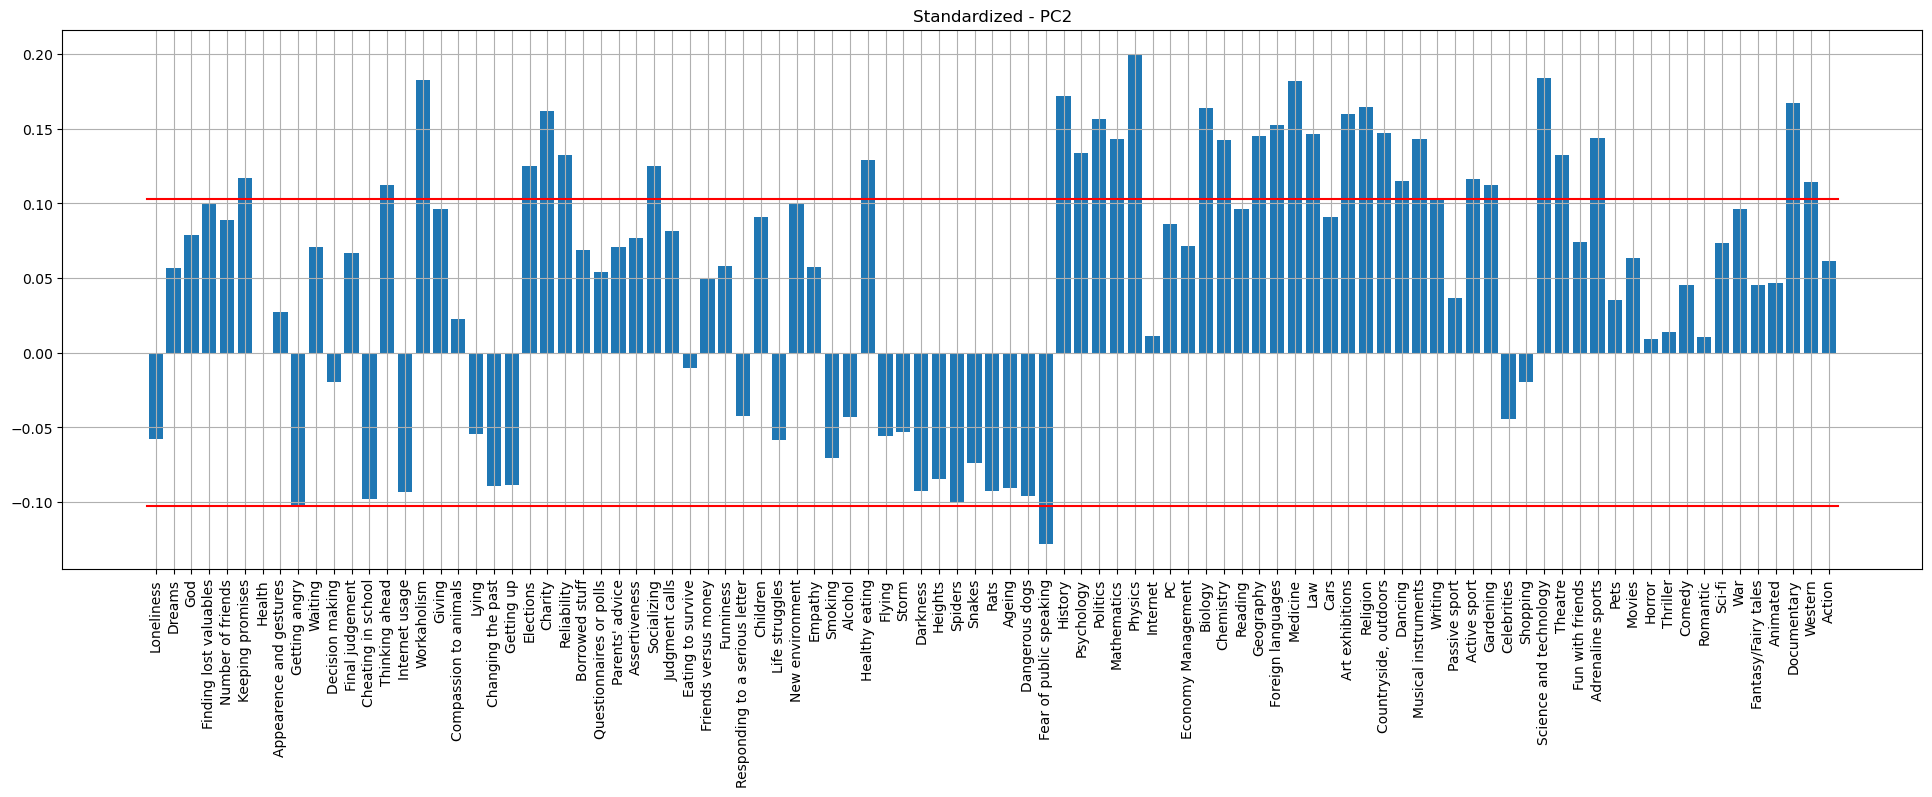


****************** PC2 standardised **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Keeping promises', 'Thinking ahead', 'Workaholism', 'Elections', 'Charity', 'Reliability', 'Socializing', 'Healthy eating', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Biology', 'Chemistry', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Active sport', 'Gardening', 'Science and technology', 'Theatre', 'Adrenaline sports', 'Documentary', 'Western']

HIGH-VALUED NEGATIVE COMPONENTS: ['Fear of public speaking']
*********************************************



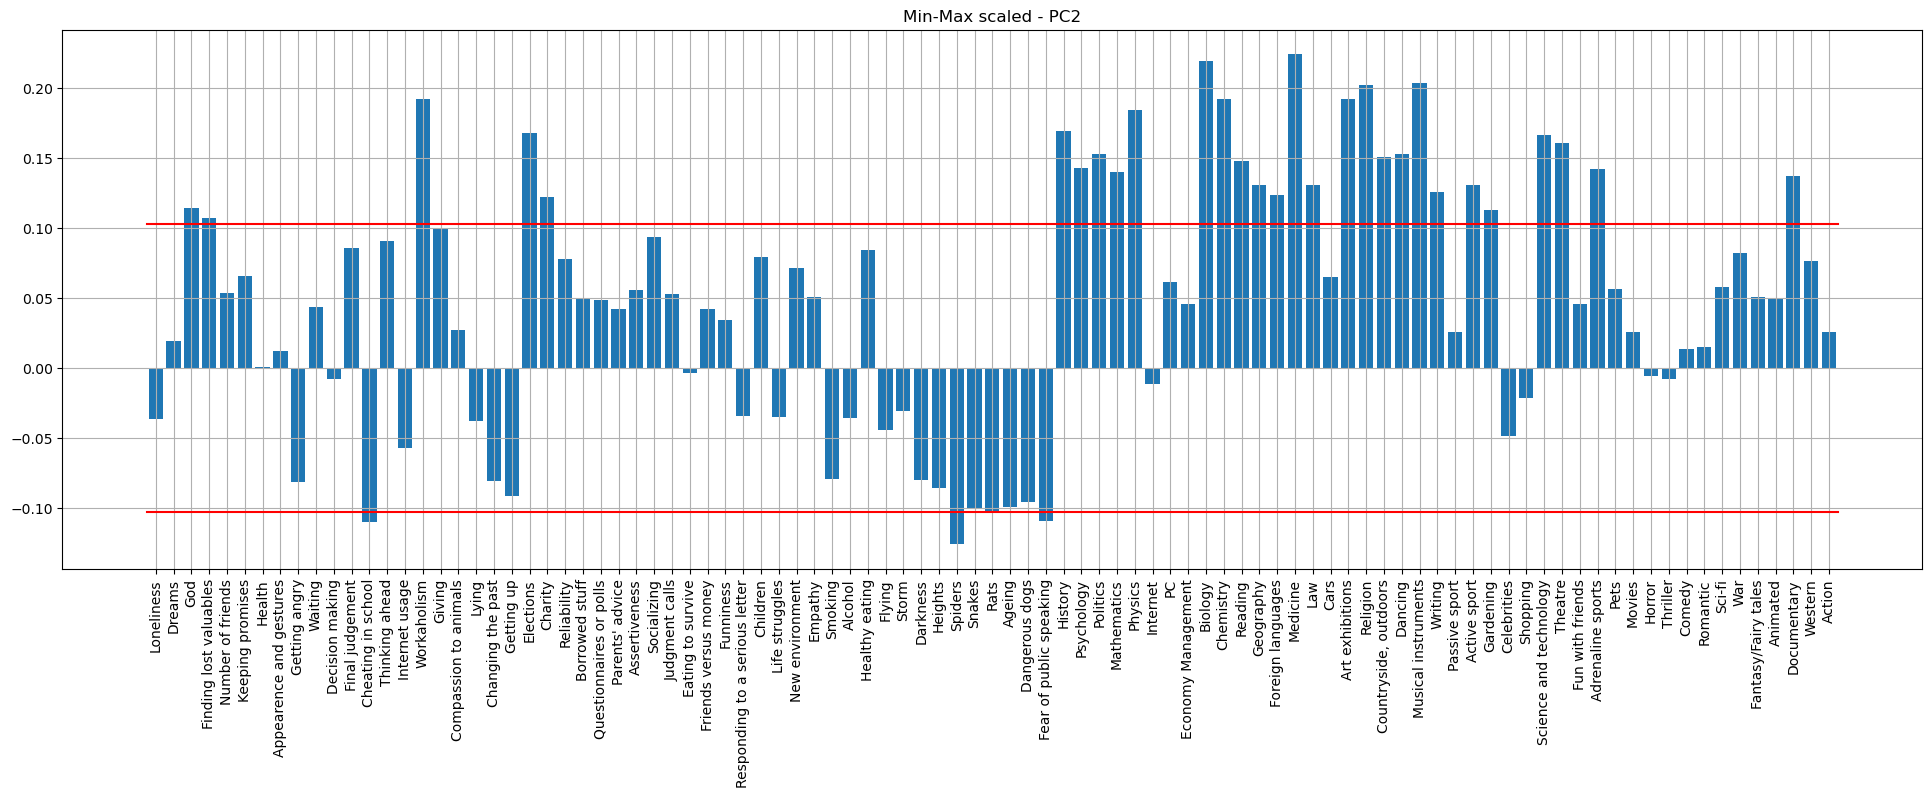


****************** PC2 min-max scaled **********************
HIGH-VALUED POSITIVE COMPONENTS: ['God', 'Finding lost valuables', 'Workaholism', 'Elections', 'Charity', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Active sport', 'Gardening', 'Science and technology', 'Theatre', 'Adrenaline sports', 'Documentary']

HIGH-VALUED NEGATIVE COMPONENTS: ['Cheating in school', 'Spiders', 'Rats', 'Fear of public speaking']
*********************************************



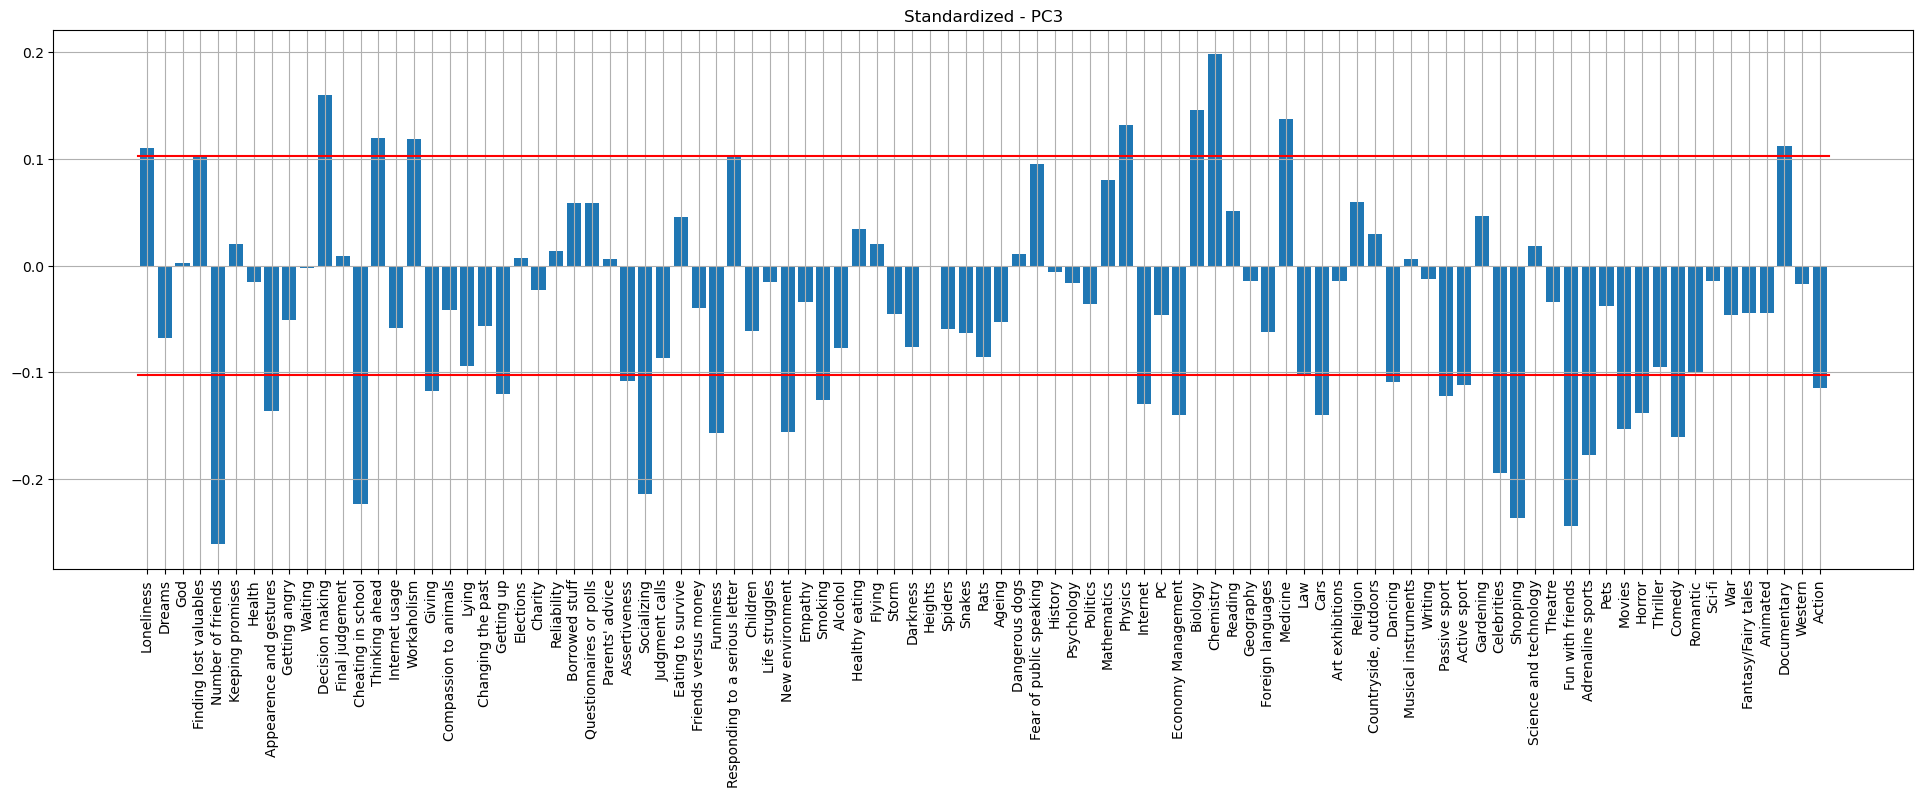


****************** PC3 standardised **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Loneliness', 'Decision making', 'Thinking ahead', 'Workaholism', 'Physics', 'Biology', 'Chemistry', 'Medicine', 'Documentary']

HIGH-VALUED NEGATIVE COMPONENTS: ['Number of friends', 'Appearence and gestures', 'Cheating in school', 'Giving', 'Getting up', 'Assertiveness', 'Socializing', 'Funniness', 'New environment', 'Smoking', 'Internet', 'Economy Management', 'Law', 'Cars', 'Dancing', 'Passive sport', 'Active sport', 'Celebrities', 'Shopping', 'Fun with friends', 'Adrenaline sports', 'Movies', 'Horror', 'Comedy', 'Action']
*********************************************



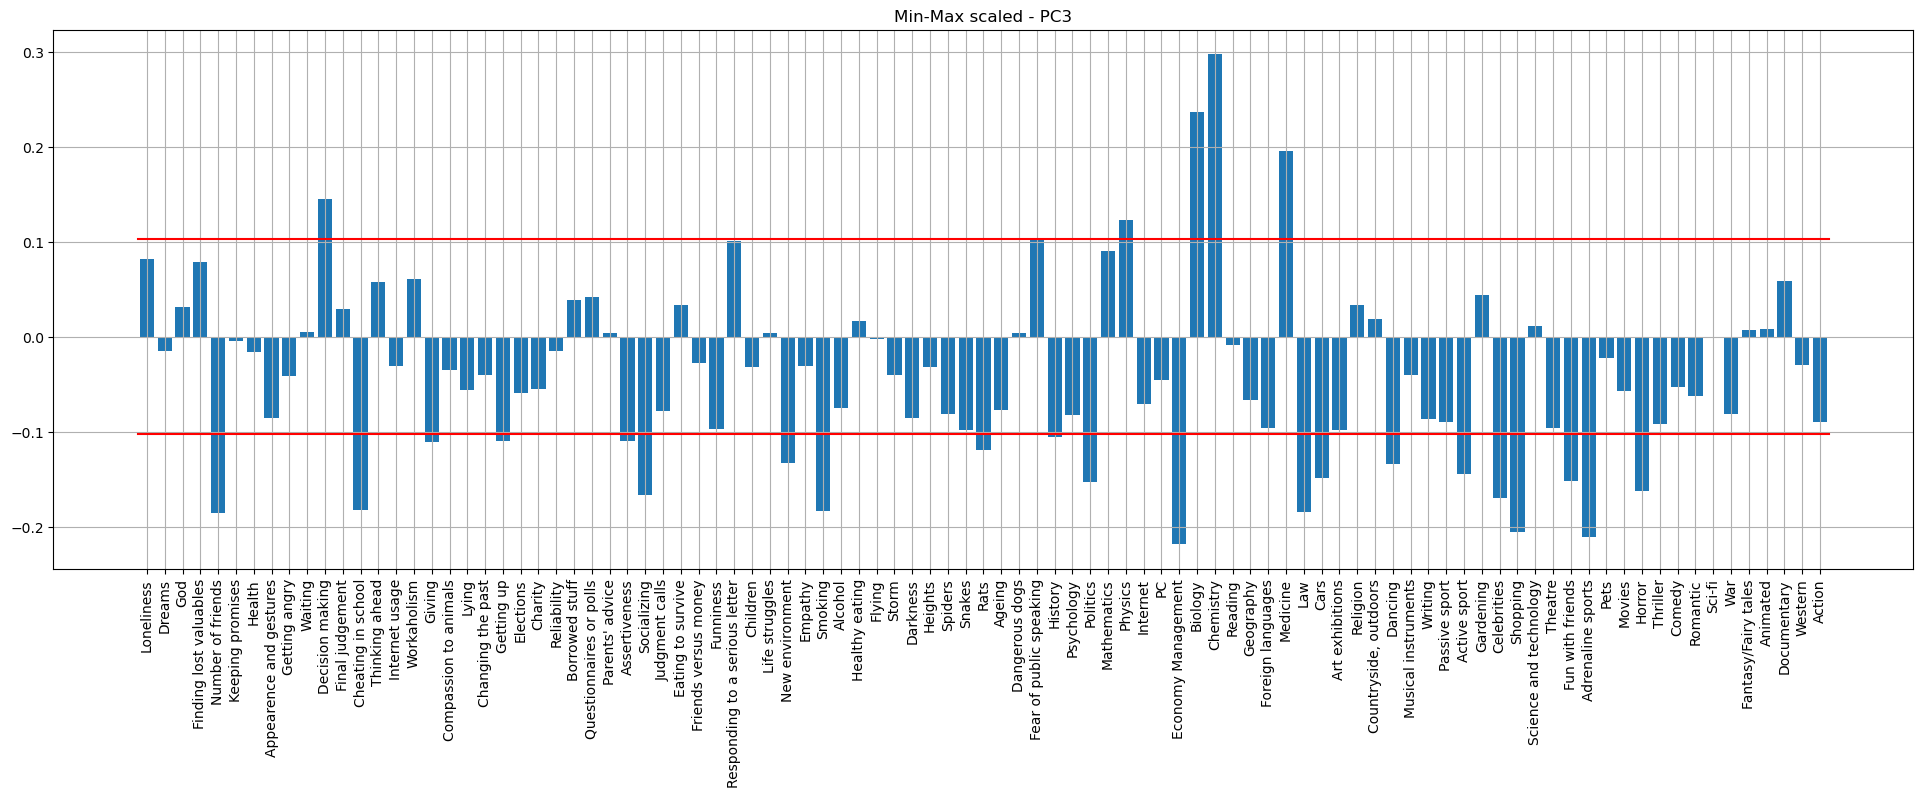


****************** PC3 min-max scaled **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Decision making', 'Fear of public speaking', 'Physics', 'Biology', 'Chemistry', 'Medicine']

HIGH-VALUED NEGATIVE COMPONENTS: ['Number of friends', 'Cheating in school', 'Giving', 'Getting up', 'Assertiveness', 'Socializing', 'New environment', 'Smoking', 'Rats', 'History', 'Politics', 'Economy Management', 'Law', 'Cars', 'Dancing', 'Active sport', 'Celebrities', 'Shopping', 'Fun with friends', 'Adrenaline sports', 'Horror']
*********************************************



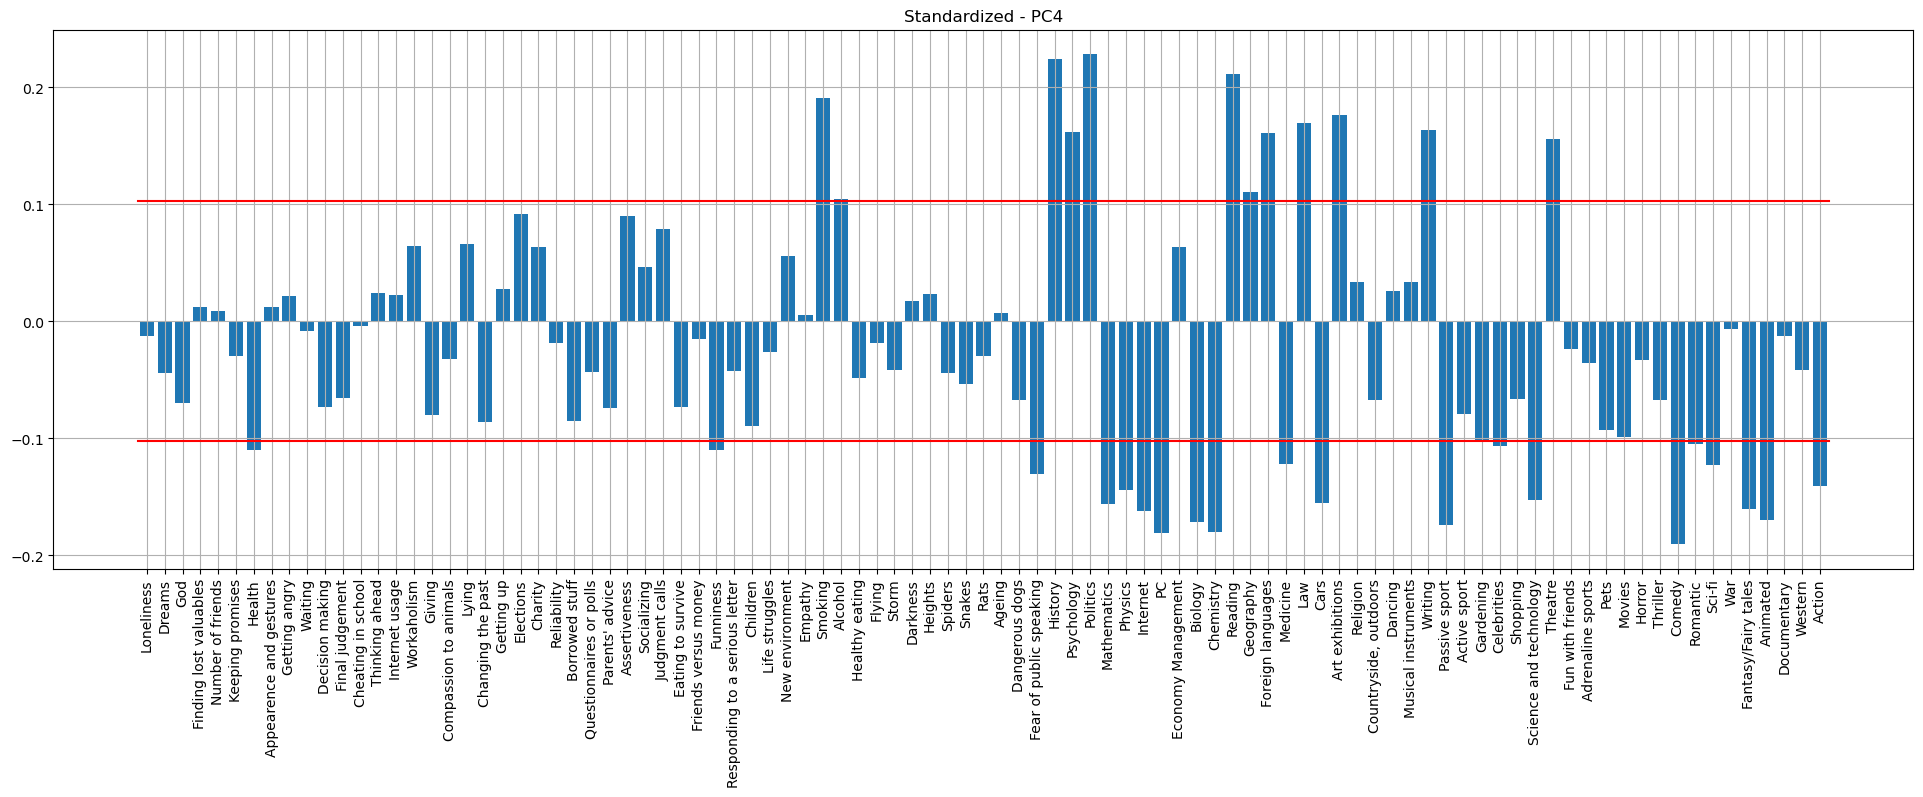


****************** PC4 standardised **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Smoking', 'Alcohol', 'History', 'Psychology', 'Politics', 'Reading', 'Geography', 'Foreign languages', 'Law', 'Art exhibitions', 'Writing', 'Theatre']

HIGH-VALUED NEGATIVE COMPONENTS: ['Health', 'Funniness', 'Fear of public speaking', 'Mathematics', 'Physics', 'Internet', 'PC', 'Biology', 'Chemistry', 'Medicine', 'Cars', 'Passive sport', 'Gardening', 'Celebrities', 'Science and technology', 'Comedy', 'Romantic', 'Sci-fi', 'Fantasy/Fairy tales', 'Animated', 'Action']
*********************************************



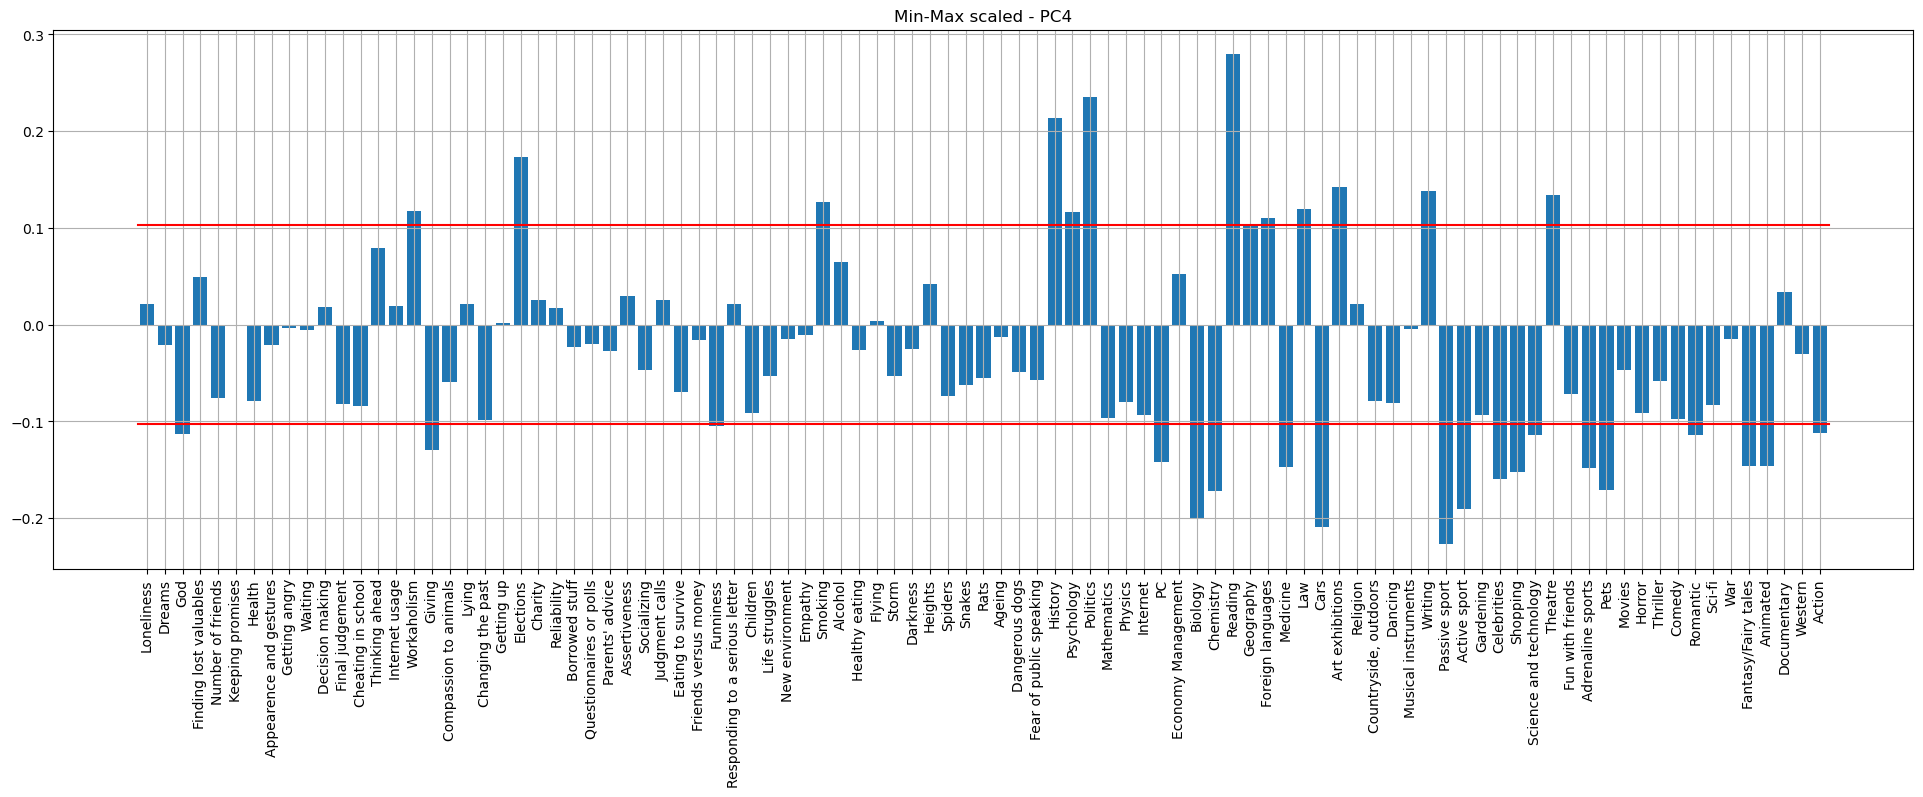


****************** PC4 min-max scaled **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Workaholism', 'Elections', 'Smoking', 'History', 'Psychology', 'Politics', 'Reading', 'Geography', 'Foreign languages', 'Law', 'Art exhibitions', 'Writing', 'Theatre']

HIGH-VALUED NEGATIVE COMPONENTS: ['God', 'Giving', 'Funniness', 'PC', 'Biology', 'Chemistry', 'Medicine', 'Cars', 'Passive sport', 'Active sport', 'Celebrities', 'Shopping', 'Science and technology', 'Adrenaline sports', 'Pets', 'Romantic', 'Fantasy/Fairy tales', 'Animated', 'Action']
*********************************************



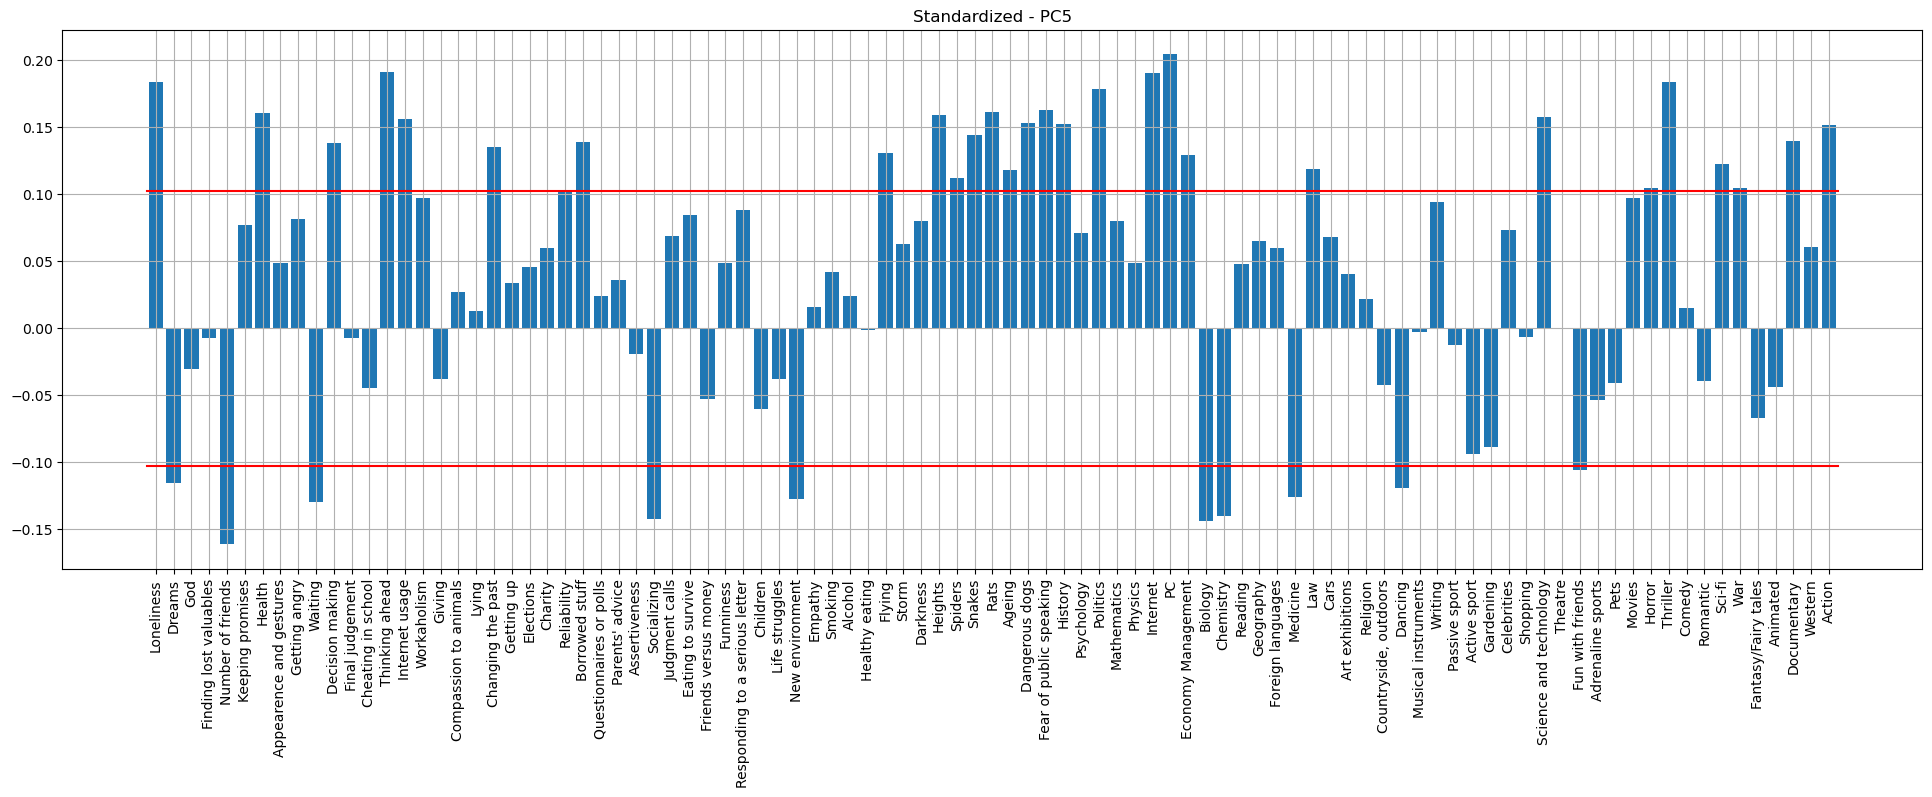


****************** PC5 standardised **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Loneliness', 'Health', 'Decision making', 'Thinking ahead', 'Internet usage', 'Changing the past', 'Reliability', 'Borrowed stuff', 'Flying', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'History', 'Politics', 'Internet', 'PC', 'Economy Management', 'Law', 'Science and technology', 'Horror', 'Thriller', 'Sci-fi', 'War', 'Documentary', 'Action']

HIGH-VALUED NEGATIVE COMPONENTS: ['Dreams', 'Number of friends', 'Waiting', 'Socializing', 'New environment', 'Biology', 'Chemistry', 'Medicine', 'Dancing', 'Fun with friends']
*********************************************



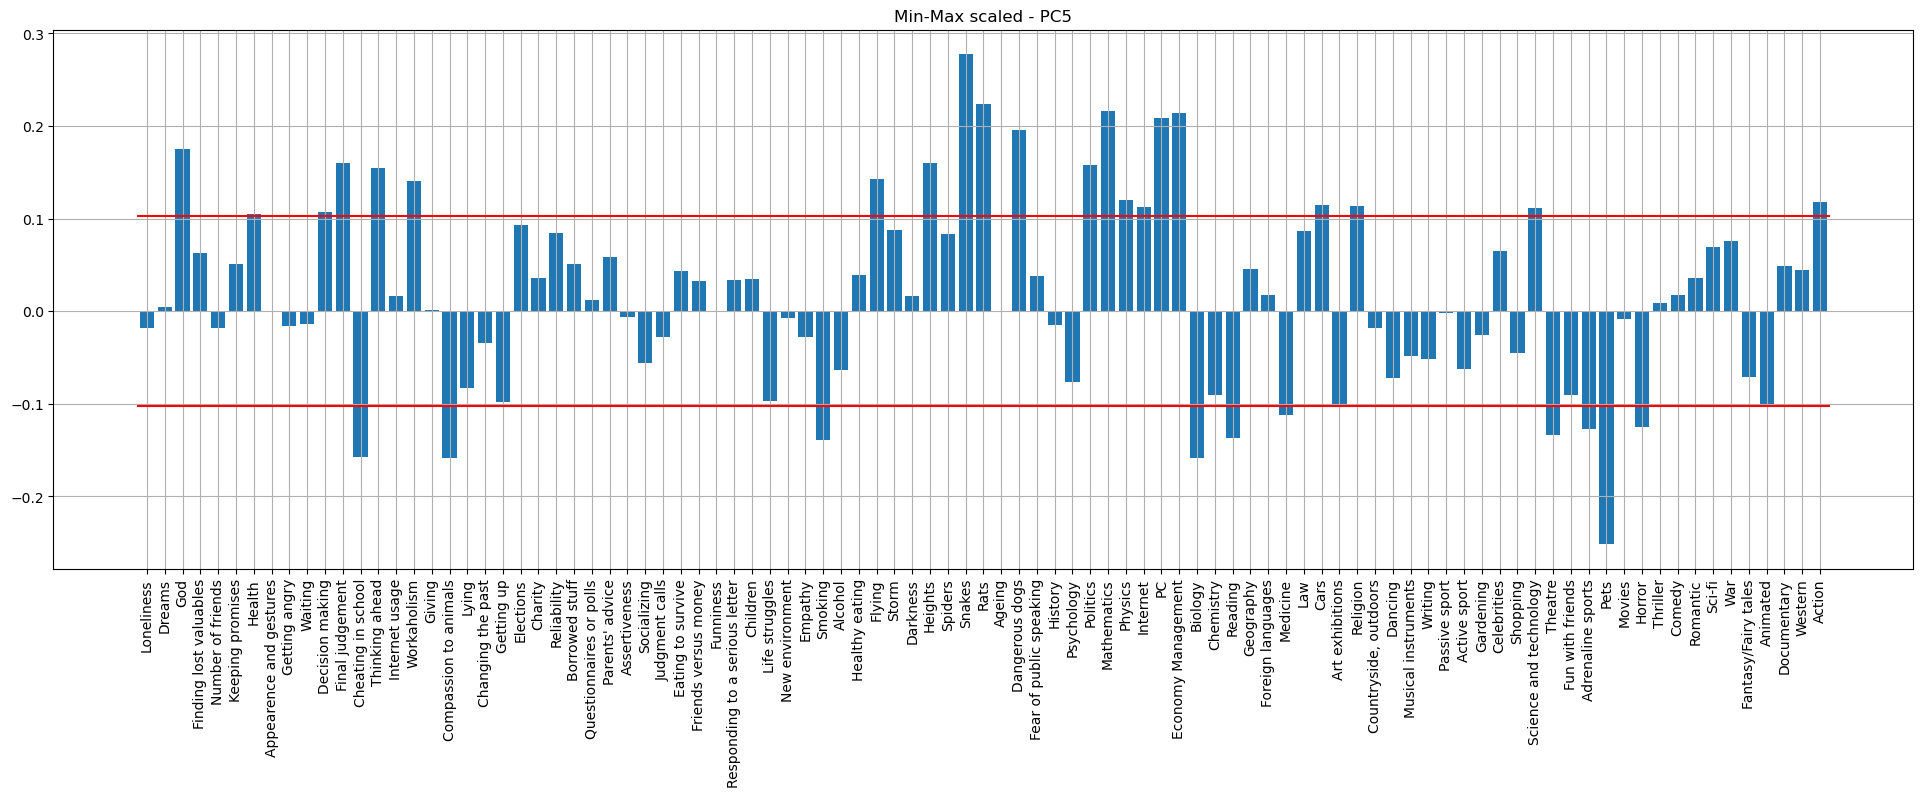


****************** PC5 min-max scaled **********************
HIGH-VALUED POSITIVE COMPONENTS: ['God', 'Health', 'Decision making', 'Final judgement', 'Thinking ahead', 'Workaholism', 'Flying', 'Heights', 'Snakes', 'Rats', 'Dangerous dogs', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Cars', 'Religion', 'Science and technology', 'Action']

HIGH-VALUED NEGATIVE COMPONENTS: ['Cheating in school', 'Compassion to animals', 'Smoking', 'Biology', 'Reading', 'Medicine', 'Theatre', 'Adrenaline sports', 'Pets', 'Horror']
*********************************************



In [132]:

# DEFINE EPSILON
eps = np.sqrt(1/pca_m_std.n_features_)  


# FOR-CYCLE TO GENERALIZE THE PLOT COMMANDS
for ii in range(m):

    #STD

    # MAKE THE BARPLOT WITH SKILL TYPE COLORS
    plt.figure(figsize=(24, 7))
    # Bar plot for PCA components
    plt.bar(
        np.arange(pca_m_std.n_features_),
        pca_m_std.components_[ii, :]
    )

    # --- RED LINES DENOTING THE THRESHOLD [-eps, +eps] ---
    plt.plot([-0.5, pca_m_std.n_features_ - 0.5], [eps, eps], 'red')  # Upper threshold line
    plt.plot([-0.5, pca_m_std.n_features_ - 0.5], [-eps, -eps], 'red')  # Lower threshold line
    
    plt.xticks(ticks=np.arange(pca_m_std.n_features_), 
            labels=Xstd_df.columns.to_list(),
            rotation=90)
    plt.title(f'Standardized - PC{ii+1}')
    plt.grid()
    plt.show()


    ind_great_pos_PCii = np.argwhere(pca_m_std.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_m_std.components_[ii, :] <= -eps).flatten()

    great_pos_PCii = [Xstd_df.columns.to_list()[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [Xstd_df.columns.to_list()[i] for i in ind_great_neg_PCii]
    
    print('')
    print(f'****************** PC{ii+1} standardised **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')  # <-- TODO!!
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')  # <-- TODO!!
    print('*********************************************')
    print('')

    #MM

    # MAKE THE BARPLOT WITH SKILL TYPE COLORS
    plt.figure(figsize=(24, 7))
    # Bar plot for PCA components
    plt.bar(
        np.arange(pca_m_mm.n_features_),
        pca_m_mm.components_[ii, :]
    )

    # --- RED LINES DENOTING THE THRESHOLD [-eps, +eps] ---
    plt.plot([-0.5, pca_m_mm.n_features_ - 0.5], [eps, eps], 'red')  # Upper threshold line
    plt.plot([-0.5, pca_m_mm.n_features_ - 0.5], [-eps, -eps], 'red')  # Lower threshold line
    
    plt.xticks(ticks=np.arange(pca_m_mm.n_features_), 
            labels=Xmm_df.columns.to_list(),
            rotation=90)
    plt.title(f'Min-Max scaled - PC{ii+1}')
    plt.grid()
    plt.show()


    ind_great_pos_PCii = np.argwhere(pca_m_mm.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_m_mm.components_[ii, :] <= -eps).flatten()

    great_pos_PCii = [Xmm_df.columns.to_list()[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [Xmm_df.columns.to_list()[i] for i in ind_great_neg_PCii]
    
    print('')
    print(f'****************** PC{ii+1} min-max scaled **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')  # <-- TODO!!
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')  # <-- TODO!!
    print('*********************************************')
    print('')


Name of PCs:

In [ ]:
#DA FARE

Question 3

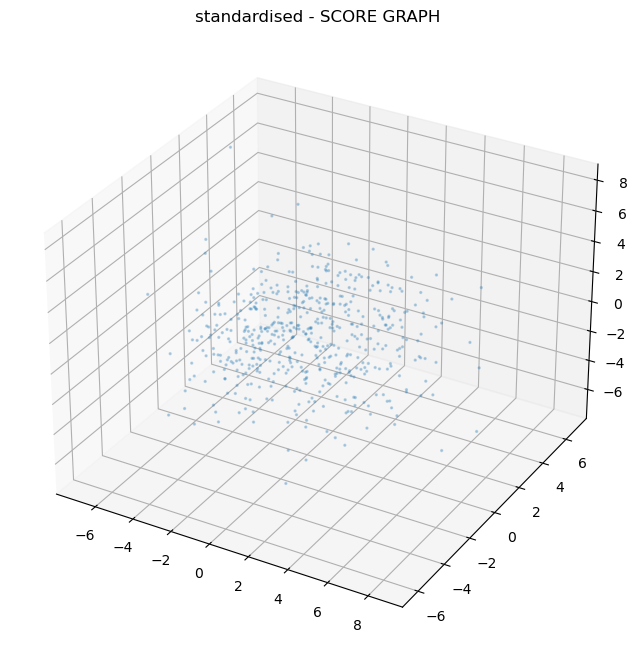

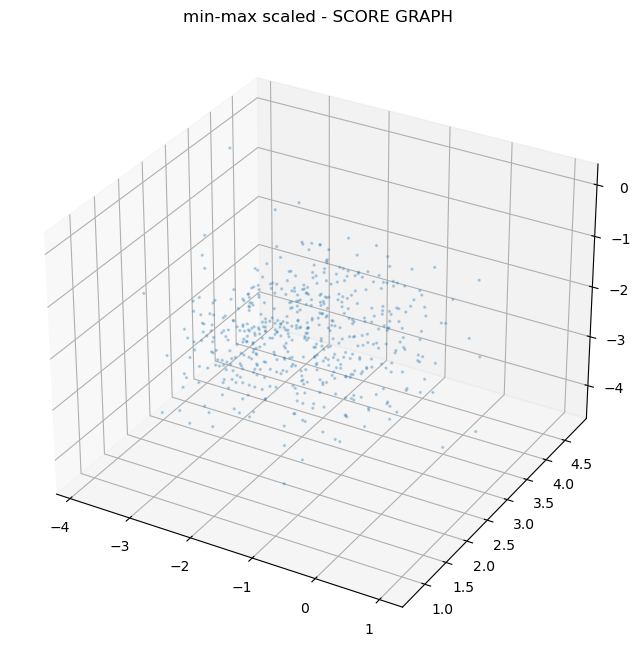

In [135]:
#STD

# COMPUTE THE DATA TRANSFORMATION INTO THE PC-SPACE
Y_std = pca_m_std.transform(Xstd_df)

# MAKE THE 3D SCORE GRAPH
ax_sg_3d = plt.figure(figsize=(8, 8))
ax_sg_3d = ax_sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Y_std[:, 0], Y_std[:, 1], Y_std[:, 2], s=2, alpha=0.25)

#ax_sg_3d.set_xlabel(pc_names[0])
#ax_sg_3d.set_ylabel(pc_names[1])
#ax_sg_3d.set_zlabel(pc_names[2])

plt.title('standardised - SCORE GRAPH')
plt.grid()
plt.show()

#MM

# COMPUTE THE DATA TRANSFORMATION INTO THE PC-SPACE
Y_mm = pca_m_std.transform(Xmm_df)

# MAKE THE 3D SCORE GRAPH
ax_sg_3d = plt.figure(figsize=(8, 8))
ax_sg_3d = ax_sg_3d.add_subplot(111, projection='3d')
ax_sg_3d.scatter(Y_mm[:, 0], Y_mm[:, 1], Y_mm[:, 2], s=2, alpha=0.25)

#ax_sg_3d.set_xlabel(pc_names[0])
#ax_sg_3d.set_ylabel(pc_names[1])
#ax_sg_3d.set_zlabel(pc_names[2])

plt.title('min-max scaled - SCORE GRAPH')
plt.grid()
plt.show()


Question 4

In [ ]:
#MANCANTE

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

Question 1

In [136]:
# INITIALIZE SOME LISTS TO STORE THE TEMPORARY RESULTS AND, THEN, MAKE COMPARISONS
km_list = []
silcoeff_list = []
k_list = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE K-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_list)):
    print(f'****************** START K-MEANS WITH k={k_list[i]} ******************')
    print('Computing...')
    
    km_list.append(KMeans(n_clusters=k_list[i], n_init=3, random_state=42))
    km = km_list[i]
    km.fit(Y_std)
    silcoeff_list.append(silhouette_score(Y_std, km.labels_))
    
    print(f'****************** END K-MEANS WITH k={k_list[i]} ******************')
    print('')

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best = np.argmax(silcoeff_list)
k = k_list[i_best]
km = km_list[i_best]

# VISUALIZE THE RESULT
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list)} --> k = {k}')
print('***************************************************************')


****************** START K-MEANS WITH k=3 ******************
Computing...
****************** END K-MEANS WITH k=3 ******************

****************** START K-MEANS WITH k=4 ******************
Computing...
****************** END K-MEANS WITH k=4 ******************

****************** START K-MEANS WITH k=5 ******************
Computing...
****************** END K-MEANS WITH k=5 ******************

****************** START K-MEANS WITH k=6 ******************
Computing...
****************** END K-MEANS WITH k=6 ******************

****************** START K-MEANS WITH k=7 ******************
Computing...
****************** END K-MEANS WITH k=7 ******************

****************** START K-MEANS WITH k=8 ******************
Computing...
****************** END K-MEANS WITH k=8 ******************

****************** START K-MEANS WITH k=9 ******************
Computing...
****************** END K-MEANS WITH k=9 ******************

****************** START K-MEANS WITH k=10 ******************


In [137]:
# INITIALIZE SOME LISTS TO STORE THE TEMPORARY RESULTS AND, THEN, MAKE COMPARISONS
km_list = []
silcoeff_list = []
k_list = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE K-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_list)):
    print(f'****************** START K-MEANS WITH k={k_list[i]} ******************')
    print('Computing...')
    
    km_list.append(KMeans(n_clusters=k_list[i], n_init=3, random_state=42))
    km = km_list[i]
    km.fit(Y_mm)
    silcoeff_list.append(silhouette_score(Y_mm, km.labels_))
    
    print(f'****************** END K-MEANS WITH k={k_list[i]} ******************')
    print('')

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best = np.argmax(silcoeff_list)
k = k_list[i_best]
km = km_list[i_best]

# VISUALIZE THE RESULT
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list)} --> k = {k}')
print('***************************************************************')

****************** START K-MEANS WITH k=3 ******************
Computing...
****************** END K-MEANS WITH k=3 ******************

****************** START K-MEANS WITH k=4 ******************
Computing...
****************** END K-MEANS WITH k=4 ******************

****************** START K-MEANS WITH k=5 ******************
Computing...
****************** END K-MEANS WITH k=5 ******************

****************** START K-MEANS WITH k=6 ******************
Computing...
****************** END K-MEANS WITH k=6 ******************

****************** START K-MEANS WITH k=7 ******************
Computing...
****************** END K-MEANS WITH k=7 ******************

****************** START K-MEANS WITH k=8 ******************
Computing...
****************** END K-MEANS WITH k=8 ******************

****************** START K-MEANS WITH k=9 ******************
Computing...
****************** END K-MEANS WITH k=9 ******************

****************** START K-MEANS WITH k=10 ******************


Question 2

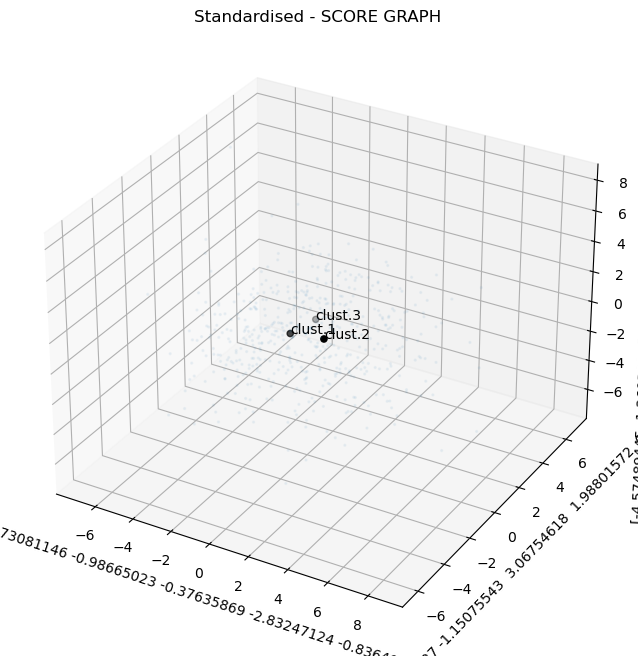

In [150]:
# MAKE THE 3D SCORE GRAPH WITH THE CENTROIDS
sg_3d_km = plt.figure(figsize=(8, 8))
ax_sg_3d_km = sg_3d_km.add_subplot(111, projection='3d')
ax_sg_3d_km.scatter(Y_std[:, 0], Y_std[:, 1], Y_std[:, 2], s=2, alpha=0.05)
ax_sg_3d_km.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], c='black')

for kk in range(k):
    ax_sg_3d_km.text(km.cluster_centers_[kk, 0], km.cluster_centers_[kk, 1], km.cluster_centers_[kk, 2], f'clust.{kk + 1}')

plt.title('Standardised - SCORE GRAPH')
ax_sg_3d_km.set_xlabel(Y_std[0])
ax_sg_3d_km.set_ylabel(Y_std[1])
ax_sg_3d_km.set_zlabel(Y_std[2])
plt.grid()
plt.show()

/Users/emanueleelias/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


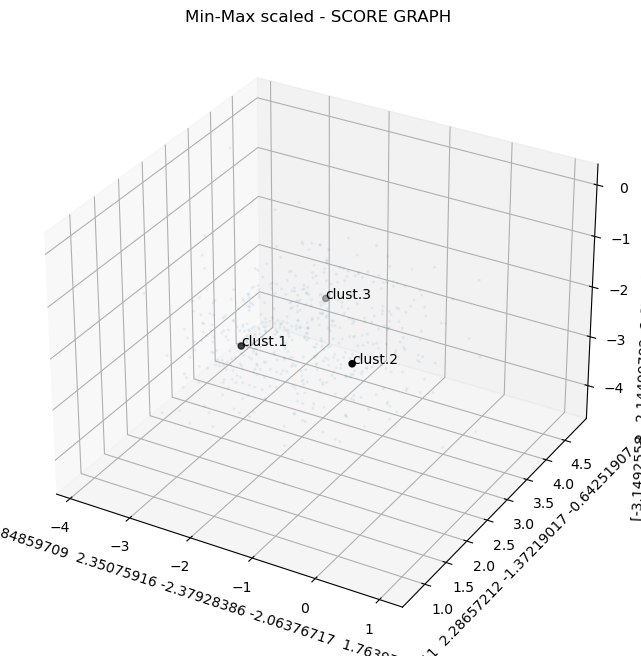

In [149]:
# MAKE THE 3D SCORE GRAPH WITH THE CENTROIDS
sg_3d_km = plt.figure(figsize=(8, 8))
ax_sg_3d_km = sg_3d_km.add_subplot(111, projection='3d')
ax_sg_3d_km.scatter(Y_mm[:, 0], Y_mm[:, 1], Y_mm[:, 2], s=2, alpha=0.05)
ax_sg_3d_km.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], c='black')

for kk in range(k):
    ax_sg_3d_km.text(km.cluster_centers_[kk, 0], km.cluster_centers_[kk, 1], km.cluster_centers_[kk, 2], f'clust.{kk + 1}')

plt.title('Min-Max scaled - SCORE GRAPH')
ax_sg_3d_km.set_xlabel(Y_mm[0])
ax_sg_3d_km.set_ylabel(Y_mm[1])
ax_sg_3d_km.set_zlabel(Y_mm[2])
plt.grid()
plt.show()

Question 3

In [144]:
#DA FARE
cluster_names = ["C1", "C2", "C3"]

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 

Question 1

In [148]:
#DA FARE

Question 2

In [145]:
silscores = silhouette_samples(Xstd_df, km.labels_)
cluster_silscores = [np.mean(silscores[km.labels_ == kk]) for kk in range(k)]

display(pd.DataFrame(np.array(cluster_silscores + [np.max(silcoeff_list)]), 
                     index=cluster_names + ['Global'], 
                     columns=['Sil. Score']))

,Sil. Score
C1,0.041629
C2,0.046869
C3,0.028996
Global,0.183283


In [146]:
silscores = silhouette_samples(Xmm_df, km.labels_)
cluster_silscores = [np.mean(silscores[km.labels_ == kk]) for kk in range(k)]

display(pd.DataFrame(np.array(cluster_silscores + [np.max(silcoeff_list)]), 
                     index=cluster_names + ['Global'], 
                     columns=['Sil. Score']))

,Sil. Score
C1,0.045870
C2,0.056323
C3,0.027365
Global,0.183283


DA FARE:

- map valori come ho fatto è corretto? sono meno di 5 possibili valori categorici
- cancellazione valori. mi pare di averne dovuti cancellare troppe di righe
- float -> int è corretto?
- devo indicare il seed ogni volta che chiamo funzione?
- colorazione scoregraphs e k-means
- maggiori spiegazioni